In [3]:
pip install pandas matplotlib seaborn


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
file1 = '/helpdesk_customer_multi_lang_tickets.csv'
file2 = '/helpdesk_customer_tickets.csv'

data1 = pd.read_csv(file1)
data2 = pd.read_csv(file2)
#Analysis of Multilingual tickets
data1.head(10)



,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\nich hoffe,...","Sehr geehrter <name>,\n\nvielen Dank für Ihre ...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\nI ...","Dear <name>,\n\nThank you for reaching out and...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\nWe are ...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\nI am reaching out to ur...","Dear <name>,\n\nWe appreciate you reaching out...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,NaN,NaN,NaN
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\nIc...","Sehr geehrter <name>,\n\nVielen Dank, dass Sie...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,NaN,NaN,NaN


In [13]:
data1.shape

(1566, 18)

In [15]:
# to get all unique values of all tags
tag_all = [x for x in data1.columns if 'tag' in x]

tag_total = pd.concat([data1[x] for x in tag_all])

unique_tag = tag_total.unique()

unique_tag,len(unique_tag)

(array(['Service Outage', 'Technical Support', 'Data Breach',
        'Customer Service', 'Returns and Exchanges', 'Login Issue',
        'Software Bug', 'Billing Issue', 'IT Support', 'Urgent Issue',
        'Product Support', 'Service Disruption', 'Network Issue',
        'Hardware Failure', 'General Inquiry', 'System Maintenance',
        'Sales Inquiry', 'Password Reset', 'Feature Request',
        'Performance Tuning', 'Technical Guidance', 'Critical Failure',
        'Service Maintenance', 'Consultoría Informática',
        'Consultation Request', 'Backup Restore', 'Product Replacement',
        'Customer Feedback', 'Refund Request', 'Incident Report',
        'Service Notification', 'Payment Processing', 'Cost Optimization',
        'Cloud Services', 'Account Assistance', 'System Crash',
        'Problem Resolution', 'Email Configuration', 'Warranty Claim',
        'Service Recovery', 'Email Support', 'Consulting Services',
        'Wireless Setup', 'Order Issue', 'Printer Setup

In [16]:
data1["language"].value_counts()

,count
language,
de,397
es,379
en,339
pt,229
fr,222


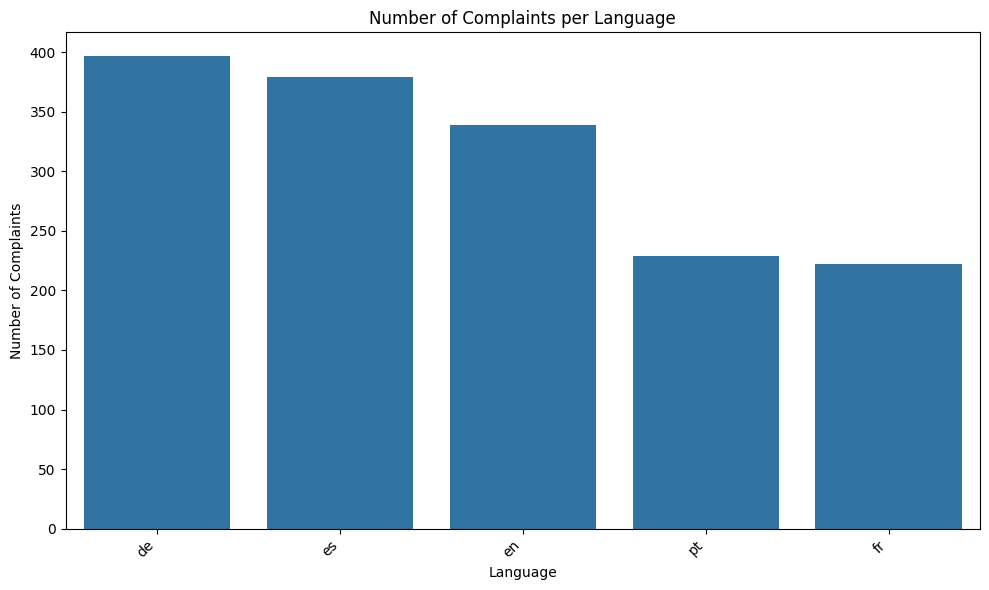

In [18]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data1 is already loaded as in your previous code
# If not, load it first:
# data1 = pd.read_csv('/helpdesk_customer_multi_lang_tickets.csv')

language_complaints = data1["language"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=language_complaints.index, y=language_complaints.values)
plt.xlabel("Language")
plt.ylabel("Number of Complaints")
plt.title("Number of Complaints per Language")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [21]:
data1["type"].value_counts()


,count
type,
Incident,663
Request,468
Problem,292
Change,143


In [22]:
data1["priority"].value_counts()

,count
priority,
high,788
medium,572
low,206


In [23]:
data1["queue"].value_counts()

,count
queue,
Technical Support,589
Product Support,288
Customer Service,234
IT Support,179
Billing and Payments,117
Sales and Pre-Sales,49
Returns and Exchanges,44
Service Outages and Maintenance,44
General Inquiry,13


In [24]:
# to find all the rows in which any tag is urgent issue
urgent_tickets = data1.loc[
    data1.iloc[:, 9:18].apply(lambda row: row.str.contains("urgent issue", case=False, na=False).any(), axis=1),
]

urgent_tickets

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\nThank you for reaching out reg...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\nEstou enfrentando ...","Caro <name>,\n\nObrigado por entrar em contato...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\nI a...","Hello <name>,\n\nWe appreciate you informing u...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,9930811597569,Crítico: Aplazamiento en la Implementación del...,"Saludos Soporte al Cliente, \n\nActualmente es...","Estimado <name>,\n\nAgradecemos su mensaje. Re...",Incident,Customer Service,high,es,IT Consulting Firm,Critical Failure,Service Disruption,Urgent Issue,Technical Support,NaN,NaN,NaN,NaN,NaN
1555,9939737054049,Gmail-Synchronisierungsproblem,"Sehr geehrter Kundenservice,\n\nIch hoffe, die...","Lieber <name>,\n\nVielen Dank, dass Sie uns be...",Incident,Technical Support,medium,de,IT Services,Technical Support,Service Disruption,Urgent Issue,Problem Resolution,Software Bug,Customer Service,NaN,NaN,NaN
1556,9942016791631,Kritisches Problem mit der Serververwaltung,"Sehr geehrtes IT Consulting Firm Support Team,...","Lieber <name>,\n\nwir danken Ihnen, dass Sie u...",Incident,Technical Support,high,de,IT Consulting Firm,Urgent Issue,IT Support,Service Disruption,System Crash,Technical Guidance,Problem Resolution,NaN,NaN,NaN
1559,9968887076096,Demande d'assistance pour une erreur d'install...,"Cher service clientèle,\n\nJe rencontre une er...","Cher <name>,\n\nMerci de nous avoir contacté c...",Problem,Technical Support,medium,fr,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [25]:

data1.isnull().sum()
 #missing values

,0
id,0
subject,1
body,1
answer,0
type,0
queue,0
priority,0
language,0
business_type,0
tag_1,0


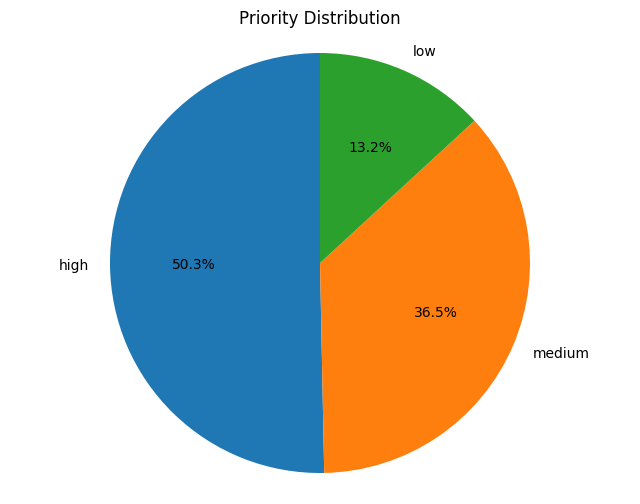

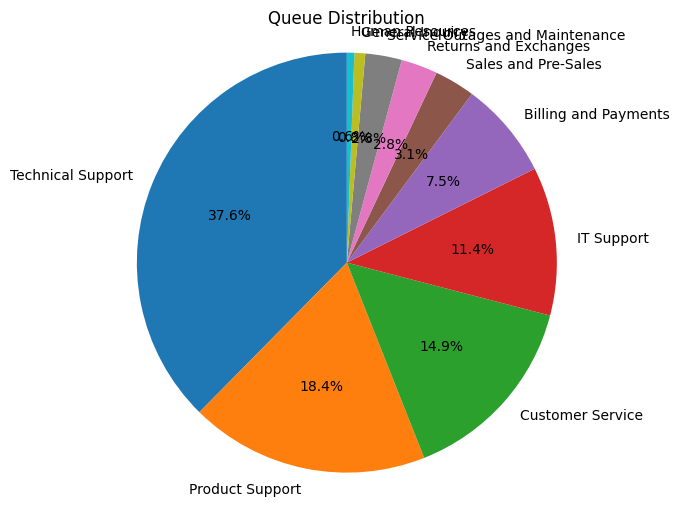

In [26]:
# prompt: pie chart for priority distribution , queue distribution

import matplotlib.pyplot as plt

# Priority distribution
priority_counts = data1["priority"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Priority Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Queue distribution
queue_counts = data1["queue"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(queue_counts, labels=queue_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Queue Distribution")
plt.axis('equal')
plt.show()